## Exploring Cash for Clunkers Data

### Explanation of the program, from [Wikipedia](https://en.wikipedia.org/wiki/Car_Allowance_Rebate_System)
The Car Allowance Rebate System (CARS), colloquially known as "cash for clunkers", was a 3 billion dollar U.S. federal scrappage program intended to provide economic incentives to U.S. residents to purchase a new, more fuel-efficient vehicle when trading in a less fuel-efficient vehicle. The program was promoted as providing stimulus to the economy by boosting auto sales, while putting safer, cleaner, and more fuel-efficient vehicles on the roadways.

### Eligibility criteria
- Vehicle must be less than 25 years old on the trade-in date.
- Only the purchase or 5 year minimum lease of new vehicles qualify.
- Generally, trade-in vehicles must get a weighted combined average rating of 18 or fewer miles per gallon (some very large pickup trucks and cargo vans have different requirements).
- Trade-in vehicles must be registered and insured continuously for the full year preceding the trade-in.
- Trade-in vehicles must be in driveable condition.
- The new car bought under the plan must have a suggested retail price of no more than 45,000 dollars, and for passenger automobiles, the new vehicle must have a combined fuel economy value of at least 22 mpg‑US

#### Data sources
Data for this program, detailing both cars traded in and new cars purchased (or leased) are listed on www.data.gov Unfortunately, the links for those datasets are currently broken.  They were retrieved using [The Internet Wayback Machine](https://archive.org/web/) with a 2013 scan date.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trade_in = pd.DataFrame
trade_in = pd.read_csv('Desktop/trade-in-vehicles.csv')
new_vehicle = pd.DataFrame
new_vehicle = pd.read_csv('Desktop/new-vehicles.csv')

### Initial Reflections on Datasets
1. Biggest thing to notice in the Trade-In data is that this is provided by with a "counts" column.  I'll have to learn how to use this when making graphs as we haven't covered it yet.
2. I'm not at all sure how the "Vehicle-Category is defined as clearly some of the vehicles listed are not Trucks or even on a truck chassis.  Examples from the New Vehicle data: Chevy Aveo, Cobalt, Impala, HHR are all listed as "Category 1 truck". Clearly something is messed up.  Description of the data set was not provided in the Wayback site.
3. The New Vehicle data is separated first by make, then by YEAR, finally by Model.  
4. Much data is missing, or at least non-standard.
5. Data is compiled by brand name, that is, GM is not individualized, but separated by Buick, Chevrolet, etc.  Same with Ford/Mercury.  If I grow interested in how _companies_ fared in the program, I'll have to aggregate this.

In [3]:
trade_in.head()

,Trade_in_Vehicle_Category,Trade_in_make,Trade_in_Model,Trade_in_Year,Count
0,1 - Category 1 Truck,AM General,DJ Po Vehicle 2WD,1984,1
1,1 - Category 1 Truck,AM General,FJ8c Post Office,1984,2
2,1 - Category 1 Truck,AM General,UNLISTED,1985,1
3,1 - Category 1 Truck,ASC Incorporat,UNLISTED,1987,1
4,1 - Category 1 Truck,Acura,3.2CL,2001,1


__Note:__ Particularly for the Trade-in data, there are Makes and Models which I am unfamiliar with.

In [4]:
new_vehicle.head()

,New_Vehicle_Category,New_Vehicle_Make,New_Vehicle_Model,New_Vehicle_Year,Count
0,1 - Category 1 Truck,Acura,RDX 2WD,2010,15
1,1 - Category 1 Truck,Acura,RDX 4WD,2007,1
2,1 - Category 1 Truck,Acura,RDX 4WD,2008,2
3,1 - Category 1 Truck,Acura,RDX 4WD,2009,136
4,1 - Category 1 Truck,Acura,RDX 4WD,2010,30


### Interesting aside:
One of the biggest effects of the program was it immediately increased the price of USED cars and trucks upon cessation of the program. [From Bureau of Labor Statistics](https://data.bls.gov/timeseries/CUUR0000SETA02?output_view=data) This is economics 101, the program made used cars scarce, it's not surprising their prices would rise.

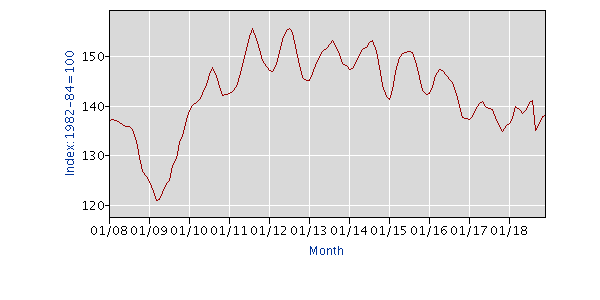

### Ideas for data exploration
1. I'd prefer to explore questions which haven't already be addressed by others.
2. How would one identify most/least popular cars/trucks?
3. What is the distribution of cars/trucks turned in?
4. What is the distribution of cars/trucks purchased?
5. Was there a significant different in the mix (by brand) of new cars purchased versus the typical market share? 
6. Was there a significant different in the mix (by body type) new cars purchased versus the typical market share? 
7. Can any of the above be explained by the rules of the program (different rebate amount for different MPG gain.)
8. What are good ideas for graphs or displays which would be useful.

Notes from messing around.  
1. If you want to use a data frame, you have to declare it as such before importing a data base.
2. Below is how to select all of one Make.  But what about the following?
  How could I select all cars who model name contains RDX?

__What is the least popular car__ That is, what Make/Model/Year was turned in more than any other?

In [5]:
trade_in[trade_in['Count']==trade_in.Count.max()]

,Trade_in_Vehicle_Category,Trade_in_make,Trade_in_Model,Trade_in_Year,Count
1275,1 - Category 1 Truck,Ford,Explorer 4WD,1997,5748


__How did the Explorer do in new car sales?__

In [6]:
new_vehicle[new_vehicle['New_Vehicle_Model']=="Explorer 4WD"]

,New_Vehicle_Category,New_Vehicle_Make,New_Vehicle_Model,New_Vehicle_Year,Count
1057,3 - Category 3 Truck,Ford,Explorer 4WD,2009,1
1267,P - Passenger Car,Ford,Explorer 4WD,2007,1


This is not surprising as they didn't pass the MPG requirement.

### How many new cars did each brand sell?

This returns a Series, whereas the next cell returns a DataFrame.  If I am looking to create bar charts or other data displays, I think I would want a DataFrame.

In [7]:
new_vehicle.groupby('New_Vehicle_Make').sum().Count

New_Vehicle_Make
Acura             991
Audi             1299
BMW               759
Buick            1138
Cadillac           43
Chevrolet       86264
Chrysler         9013
Dodge           24048
Ford            89995
GMC              9677
Honda           87611
Hummer             15
Hyundai         48731
Infiniti           20
Isuzu               4
Jeep            11183
Kia             28920
Lexus            3659
Lincoln           608
MINI             2787
Mazda           16130
Mercedes-Be       154
Mercury          6620
Mitsubishi       3534
Nissan          58645
Pontiac         16630
Saab               68
Saturn           5327
Scion            7851
Subaru          16762
Suzuki           3684
Toyota         120451
Volkswagen      12390
Volvo             944
smart            1126
Name: Count, dtype: int64

In [8]:
new_vehicle.groupby('New_Vehicle_Make').sum()[['Count']]

,Count
New_Vehicle_Make,
Acura,991
Audi,1299
BMW,759
Buick,1138
Cadillac,43
Chevrolet,86264
Chrysler,9013
Dodge,24048
Ford,89995


### Idea for graphic
Simple plot pie charts for sales through Cash for Clunkers and the historic market share. Conclusions/explainations might include:
1. Mix of company's vehicle fleet
2. Previous discounting of cars from the company in question

### How to gather all models with only minor differences
This is necessary to, for example, collect all models named "Silverado", a common truck in the Chevy line.  There is a large number of such trucks, to be able to gather them all together was harder than I thought it would be. After a very difficult exploration, I learned how to compute the number of all the model cars which start with a particular substring. 

In [9]:
new_vehicle[new_vehicle.New_Vehicle_Model.str.startswith('Silver')].sum().Count

15804

So I thought I would create a function which could do this for ANY string

In [10]:
cars={}

In [11]:
cars

{}

In [12]:
def HowManyOf(myString,myD):
    found = new_vehicle[new_vehicle.New_Vehicle_Model.str.startswith(myString)]
    myD[myString] = found.sum().Count
    return myD[myString]

In [13]:
HowManyOf("Explor",cars)

114

If, given a list of Beginning characters for models of cars, one could easily construct a dictionary connecting counts with those model appreviations.

In [14]:
for model in ["RDX","TSX","A3","A4"]: 
    HowManyOf(model,cars)

In [15]:
 cars['A4']

828

#### GOALS
 - Automate the "collapsing" of all models with similar names (ignoring years and model differences) and place them into a new data frame.  If possible, include data from weighted average MPG figures. This means I will have to look up MPG data _before_ collapsing the data.  This is going to require I learn how to write a python function which uses panda. (see below)
 - Automatically replace Make with parent company.  Make sure that I'm correct about who owned which brand in 2009. Perhaps rather then changing Make, I'd be better off adding a new field of 'Parent'. I'm going to assume that someone has addressed this on-line
 
__HELP__ 


#### Challenge: 
Find how many people bought a hybrid car. Did Cash for Clunkers sell a lot of "leftover" hybrids?

In [16]:
hybrids=new_vehicle[new_vehicle.New_Vehicle_Model.str.contains("Hybrid")]

__Remember__ If you are looking to count by the contents in another column, it takes two brackets.

In [17]:
hybrids.groupby('New_Vehicle_Year').sum()[['Count']]

,Count
New_Vehicle_Year,
2007,24
2008,176
2009,6864
2010,2874


It doesn't seem that a high percentage of hybrids were from previous model years.

Could this be done in one step without defining "hybrids"? Sure, why not?

In [18]:
new_vehicle[new_vehicle.New_Vehicle_Model.str.contains("Hybrid")].groupby('New_Vehicle_Year').sum()['Count']

New_Vehicle_Year
2007      24
2008     176
2009    6864
2010    2874
Name: Count, dtype: int64

## How to create a python function to return a number from a pandas query
QQ Well that didn't work.... wonder why not...<br>
In any event, if I have a hope of importing MPG data automatically, I am going to have to learn how to do this.

In [19]:
new_vehicle[new_vehicle.New_Vehicle_Model.str.startswith("Explor")].sum().Count

114

# This is the big sticking point...
This attempt at defining such a function did not work.  Need to go over it.
If I can't get such a function defined, I cannot see a way to automate the process of things like counting each model of car.

In [20]:
def HowManyOfWhat(myMatch, myFieldToMatch, myFieldToSum):
    return(new_vehicle[new_vehicle.myFieldToMatch.str.startswith(myMatch)].sum().myFieldToSum)

In [21]:
HowManyOfWhat("RDX",New_Vehicle_Model,Count)

NameError: name 'New_Vehicle_Model' is not defined